In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip= True
                                  )
train_generator = train_datagen.flow_from_directory(
    './chest_xray/train',
    target_size=(120,120),
    batch_size=20,
    color_mode = 'grayscale',
    class_mode='binary',
    shuffle=True
)

Found 5216 images belonging to 2 classes.


In [3]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    './chest_xray/test',
    target_size=(120,120),
    batch_size=20, 
    color_mode = 'grayscale',
    class_mode='binary',
    shuffle = True
)

Found 624 images belonging to 2 classes.


In [4]:
model = tf.keras.models.Sequential([
#     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(120,120,1),padding='same'),
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    
#     tf.keras.layers.DropOut(0.2),#此处和BN替换实验
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
#     tf.keras.layers.BatchNormalization(),
    
#     tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding = 'same'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
model.compile(loss = 'mse',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 120, 120, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        3

In [7]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,#100
    epochs=500,
    validation_data=validation_generator,
    validation_steps=50,# 50
    verbose=2,
#     callbacks=[callbacks]
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/500
100/100 - 68s - loss: 0.0733 - acc: 0.9100 - val_loss: 0.3705 - val_acc: 0.6291
Epoch 2/500
100/100 - 68s - loss: 0.0404 - acc: 0.9485 - val_loss: 0.6181 - val_acc: 0.3812
Epoch 3/500
100/100 - 64s - loss: 0.0388 - acc: 0.9504 - val_loss: 0.3677 - val_acc: 0.6280
Epoch 4/500
100/100 - 64s - loss: 0.0280 - acc: 0.9665 - val_loss: 0.3663 - val_acc: 0.6271
Epoch 5/500
100/100 - 64s - loss: 0.0252 - acc: 0.9690 - val_loss: 0.3416 - val_acc: 0.6270
Epoch 6/500
100/100 - 65s - loss: 0.0288 - acc: 0.9639 - val_loss: 0.3263 - val_acc: 0.6601
Epoch 7/500
100/100 - 64s - loss: 0.0156 - acc: 0.9795 - val_loss: 0.3734 - val_acc: 0.6209
Epoch 8/500
100/100 - 63s - loss: 0.0300 - acc: 0.9624 - val_loss: 0.4050 - val_acc: 0.5203
Epoch 9/500
100/100 - 64s - loss: 0.0190 - acc: 0.9770 - val_loss: 0.3767 - val_acc: 0.6126
Epoch 10/500
100/100 - 63s - loss: 0.0182 - acc: 0.9760 - val_loss: 0.5699 - val_acc: 0.4106
Epo

Epoch 87/500
100/100 - 63s - loss: 0.0020 - acc: 0.9975 - val_loss: 0.3831 - val_acc: 0.6169
Epoch 88/500
100/100 - 65s - loss: 0.0027 - acc: 0.9975 - val_loss: 0.5613 - val_acc: 0.4070
Epoch 89/500
100/100 - 63s - loss: 0.0021 - acc: 0.9965 - val_loss: 0.1968 - val_acc: 0.7541
Epoch 90/500
100/100 - 62s - loss: 0.0014 - acc: 0.9985 - val_loss: 0.2025 - val_acc: 0.7841
Epoch 91/500
100/100 - 64s - loss: 0.0010 - acc: 0.9990 - val_loss: 0.3554 - val_acc: 0.6395
Epoch 92/500
100/100 - 63s - loss: 0.0016 - acc: 0.9980 - val_loss: 0.3705 - val_acc: 0.6270
Epoch 93/500
100/100 - 64s - loss: 0.0036 - acc: 0.9950 - val_loss: 0.2240 - val_acc: 0.7603
Epoch 94/500
100/100 - 63s - loss: 0.0025 - acc: 0.9970 - val_loss: 0.1561 - val_acc: 0.8283
Epoch 95/500
100/100 - 63s - loss: 0.0044 - acc: 0.9955 - val_loss: 0.2146 - val_acc: 0.7717
Epoch 96/500
100/100 - 64s - loss: 0.0014 - acc: 0.9980 - val_loss: 0.3709 - val_acc: 0.6291
Epoch 97/500
100/100 - 63s - loss: 0.0015 - acc: 0.9980 - val_loss: 0.

100/100 - 64s - loss: 0.0020 - acc: 0.9975 - val_loss: 0.2616 - val_acc: 0.7276
Epoch 174/500
100/100 - 63s - loss: 7.3211e-04 - acc: 0.9990 - val_loss: 0.3395 - val_acc: 0.6550
Epoch 175/500
100/100 - 63s - loss: 1.7451e-05 - acc: 1.0000 - val_loss: 0.1491 - val_acc: 0.8242
Epoch 176/500
100/100 - 64s - loss: 0.0015 - acc: 0.9975 - val_loss: 0.1744 - val_acc: 0.8027
Epoch 177/500
100/100 - 63s - loss: 0.0021 - acc: 0.9980 - val_loss: 0.3355 - val_acc: 0.6570
Epoch 178/500
100/100 - 64s - loss: 5.4310e-05 - acc: 1.0000 - val_loss: 0.2317 - val_acc: 0.7561
Epoch 179/500
100/100 - 63s - loss: 4.3806e-04 - acc: 0.9995 - val_loss: 0.2337 - val_acc: 0.7521
Epoch 180/500
100/100 - 63s - loss: 0.0011 - acc: 0.9985 - val_loss: 0.3379 - val_acc: 0.6575
Epoch 181/500
100/100 - 64s - loss: 9.1617e-04 - acc: 0.9990 - val_loss: 0.2482 - val_acc: 0.7407
Epoch 182/500
100/100 - 63s - loss: 0.0016 - acc: 0.9980 - val_loss: 0.2198 - val_acc: 0.7727
Epoch 183/500
100/100 - 64s - loss: 0.0017 - acc: 0.99

Epoch 259/500
100/100 - 63s - loss: 2.1061e-04 - acc: 1.0000 - val_loss: 0.3002 - val_acc: 0.6931
Epoch 260/500
100/100 - 64s - loss: 5.2742e-04 - acc: 0.9995 - val_loss: 0.2365 - val_acc: 0.7583
Epoch 261/500
100/100 - 64s - loss: 0.0012 - acc: 0.9990 - val_loss: 0.3595 - val_acc: 0.6382
Epoch 262/500
100/100 - 65s - loss: 1.2154e-04 - acc: 1.0000 - val_loss: 0.3532 - val_acc: 0.6426
Epoch 263/500
100/100 - 64s - loss: 0.0014 - acc: 0.9980 - val_loss: 0.3563 - val_acc: 0.6395
Epoch 264/500
100/100 - 64s - loss: 0.0011 - acc: 0.9980 - val_loss: 0.2894 - val_acc: 0.7033
Epoch 265/500
100/100 - 63s - loss: 7.0551e-04 - acc: 0.9990 - val_loss: 0.1737 - val_acc: 0.8223
Epoch 266/500
100/100 - 62s - loss: 4.8598e-04 - acc: 0.9995 - val_loss: 0.3708 - val_acc: 0.6280
Epoch 267/500
100/100 - 64s - loss: 0.0010 - acc: 0.9990 - val_loss: 0.3187 - val_acc: 0.6756
Epoch 268/500
100/100 - 63s - loss: 0.0020 - acc: 0.9980 - val_loss: 0.1574 - val_acc: 0.8316
Epoch 269/500
100/100 - 64s - loss: 0.00

Epoch 345/500
100/100 - 63s - loss: 0.0017 - acc: 0.9975 - val_loss: 0.1812 - val_acc: 0.8059
Epoch 346/500
100/100 - 64s - loss: 4.1529e-04 - acc: 0.9990 - val_loss: 0.3626 - val_acc: 0.6353
Epoch 347/500
100/100 - 63s - loss: 5.9657e-04 - acc: 0.9990 - val_loss: 0.2421 - val_acc: 0.7510
Epoch 348/500
100/100 - 63s - loss: 0.0018 - acc: 0.9980 - val_loss: 0.3454 - val_acc: 0.6535
Epoch 349/500
100/100 - 64s - loss: 9.6730e-04 - acc: 0.9990 - val_loss: 0.3408 - val_acc: 0.6539
Epoch 350/500
100/100 - 64s - loss: 5.0755e-04 - acc: 0.9995 - val_loss: 0.1769 - val_acc: 0.8140
Epoch 351/500
100/100 - 64s - loss: 0.0017 - acc: 0.9980 - val_loss: 0.2092 - val_acc: 0.7696
Epoch 352/500
100/100 - 63s - loss: 0.0024 - acc: 0.9970 - val_loss: 0.1415 - val_acc: 0.8496
Epoch 353/500
100/100 - 63s - loss: 9.1184e-04 - acc: 0.9985 - val_loss: 0.1750 - val_acc: 0.8201
Epoch 354/500
100/100 - 64s - loss: 6.1971e-04 - acc: 0.9990 - val_loss: 0.1143 - val_acc: 0.8647
Epoch 355/500
100/100 - 63s - loss: 

Epoch 430/500
100/100 - 54s - loss: 0.0011 - acc: 0.9985 - val_loss: 0.2281 - val_acc: 0.7583
Epoch 431/500
100/100 - 54s - loss: 0.0026 - acc: 0.9965 - val_loss: 0.2978 - val_acc: 0.6972
Epoch 432/500
100/100 - 54s - loss: 5.2768e-04 - acc: 0.9995 - val_loss: 0.2341 - val_acc: 0.7583
Epoch 433/500
100/100 - 54s - loss: 0.0016 - acc: 0.9980 - val_loss: 0.1869 - val_acc: 0.8079
Epoch 434/500
100/100 - 54s - loss: 0.0010 - acc: 0.9985 - val_loss: 0.1681 - val_acc: 0.8171
Epoch 435/500
100/100 - 54s - loss: 0.0011 - acc: 0.9990 - val_loss: 0.1611 - val_acc: 0.8326
Epoch 436/500
100/100 - 54s - loss: 3.4322e-06 - acc: 1.0000 - val_loss: 0.2415 - val_acc: 0.7500
Epoch 437/500
100/100 - 54s - loss: 5.6994e-05 - acc: 1.0000 - val_loss: 0.3328 - val_acc: 0.6653
Epoch 438/500
100/100 - 54s - loss: 0.0012 - acc: 0.9990 - val_loss: 0.2919 - val_acc: 0.7025
Epoch 439/500
100/100 - 54s - loss: 4.9544e-04 - acc: 0.9995 - val_loss: 0.2828 - val_acc: 0.7104
Epoch 440/500
100/100 - 53s - loss: 3.9748e-

In [10]:
import numpy as np
np.savetxt("module_1_loss",loss)
np.savetxt("module_1_acc",acc)

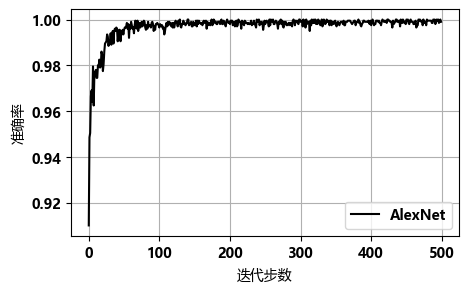

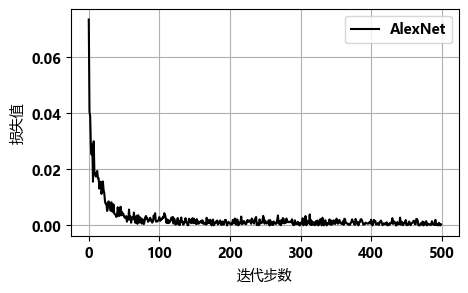

In [15]:
from matplotlib import pyplot as plt
font = {"family":"Microsoft Yahei", "weight":'bold'}
plt.rc('font',**font)
# accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epoches = range(len(acc))
plt.figure(figsize=(5,3),dpi=100)
plt.plot(epoches,acc,label='AlexNet',color='black')
plt.grid(0.2)
# plt.plot(epoches, val_acc, label = 'val_acc')
plt.legend()
plt.ylabel("准确率")
plt.xlabel("迭代步数")
plt.show()
plt.figure(figsize=(5,3),dpi=100)
plt.plot(epoches,loss,label='AlexNet',color='black')
plt.grid(0.2)
# plt.plot(epoches,val_loss,label='val_loss')
plt.legend()
plt.ylabel("损失值")
plt.xlabel("迭代步数")
plt.show()

In [19]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import os
os.chdir('D:/PycharmProjects/tf2_example/chest_xray/test/NORMAL')
print("以下是正常图像的预测结果：")
time = 0
t = 0
for i in os.listdir():
    try:
        img = load_img(i, target_size=(120, 120), 
                       color_mode='grayscale'
                      )
    except:pass
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=1)
#     print(classes[0])
    if classes[0]==1:
        t+=1
    time+=1
print("共有",time,'个样本','准确率为:',1-t/time)
os.chdir('D:/PycharmProjects/tf2_example/chest_xray/test/PNEUMONIA')
print("以下是不正常图像的预测结果：")
# time = 0
for i in os.listdir():
    try:
        img = load_img(i, target_size=(120, 120), 
                       color_mode='grayscale'
                      )
    except:
        continue
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=1)
#     print(classes[0])
    if classes[0]==0:
        t+=1
    time+=1
print("共有",time,'个样本','准确率为：',1-t/time)
os.chdir('D:/PycharmProjects/tf2_example')

以下是正常图像的预测结果：
共有 234 个样本 准确率为: 0.07692307692307687
以下是不正常图像的预测结果：
共有 624 个样本 准确率为： 0.6266025641025641
